In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pprint import pprint

In [102]:
def full_print(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(df)

## Reading DF

In [40]:
df = pd.read_csv('breast-cancer.data', header=None)
df.columns = ['y', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 
              'deg-malig', 'side', 'quad', 'irradiat']
df

,y,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,side,quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


## Fixing DF

### Remove NaN

In [21]:
len(df)

286

In [41]:
df = df.applymap(lambda d: d if not d == '?' else np.nan)
df = df.dropna()
len(df)

277

9 NaNs dropped, this matches the data description

### Encode categorical values

In [42]:
df = df.reset_index(drop=True)
df = pd.get_dummies(df, prefix_sep='_')
df = df[[i for i in df.columns if not i in ['y_no-recurrence-events', 'node-caps_no', 'irradiat_no']]]
df

,deg-malig,y_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,...,inv-nodes_9-11,node-caps_yes,side_left,side_right,quad_central,quad_left_low,quad_left_up,quad_right_low,quad_right_up,irradiat_yes
0,3,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,2,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,2,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
6,2,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
8,2,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
9,2,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


## Correlação entre as colunas

#### (lembrete importante: correlação não implica causalidade)

In [103]:
correlations_matrix = df[['y_recurrence-events', *[i for i in df.columns 
                                                   if not i == 'y_recurrence-events']]].corr()
full_print(correlations_matrix)

                     y_recurrence-events  deg-malig  age_20-29  age_30-39  \
y_recurrence-events             1.000000   0.330253  -0.038695   0.105570   
deg-malig                       0.330253   1.000000  -0.004772   0.043031   
age_20-29                      -0.038695  -0.004772   1.000000  -0.023264   
age_30-39                       0.105570   0.043031  -0.023264   1.000000   
age_40-49                       0.016566   0.009116  -0.041415  -0.265925   
age_50-59                      -0.077901   0.007845  -0.042103  -0.270338   
age_60-69                       0.018243  -0.027036  -0.029961  -0.192375   
age_70-79                      -0.087160  -0.085174  -0.008161  -0.052401   
menopause_ge40                 -0.047401   0.048813  -0.053794  -0.345410   
menopause_lt40                 -0.087160  -0.010748  -0.008161   0.028239   
menopause_premeno               0.070514  -0.045776   0.055790   0.336690   
tumor-size_0-4                 -0.063472  -0.072837  -0.010380   0.061560   

Observando a matriz de correlação:

+ Idade não tem correlação
+ Deg-malig tem correlação
+ Menopausa não parece ter correlação
+ Tamanho de tumor com maior correlação: 30-34
+ inv-nodes tem correlação
+ node-caps tem correlação
+ breast-quad não parece ter correlação
+ irradiat tem correlação

## Visualizing

In [110]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [146]:
original_df = pd.read_csv('breast-cancer.data', header=None)
original_df.columns = ['y', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 
              'deg-malig', 'side', 'quad', 'irradiat']
original_df['y'] = original_df['y'].map(lambda d: 0 if d.startswith('no') else 1)
original_df = original_df.applymap(lambda d: d if not d == '?' else np.nan)
original_df = original_df.dropna()
original_df

,y,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,side,quad,irradiat
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,0,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,0,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,0,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,0,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,0,40-49,premeno,20-24,0-2,no,2,right,left_up,no


### Recorrência total do DF

In [147]:
len(original_df[original_df['y'] == 1])/len(original_df)

0.2924187725631769

29.24% de recorrência

### Some Utils

In [124]:
def histogram_of_column(column):
    aux = sorted(original_df[column].unique())
    plt.bar(x=aux, height=[len(original_df[original_df[column] == i]) for i in aux])
    return aux

In [134]:
def percent_per_category(df, column, class_column, keys):
    r = {}
    for key in keys:
        aux_df = df[df[column] == key]
        rate = len(aux_df[aux_df[class_column] == 1])/len(aux_df)
        print(f'Positive recurrence rate for key {key}: {rate}')
        r[key] = rate
        
    return r

### Avaliando o dataset por faixa etária

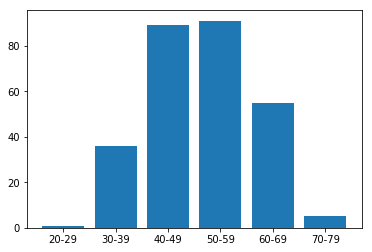

In [148]:
ages = histogram_of_column('age')

Quantidade de casos no dataset por faixa etária

Positive recurrence rate for key 20-29: 0.0
Positive recurrence rate for key 30-39: 0.4166666666666667
Positive recurrence rate for key 40-49: 0.30337078651685395
Positive recurrence rate for key 50-59: 0.24175824175824176
Positive recurrence rate for key 60-69: 0.3090909090909091
Positive recurrence rate for key 70-79: 0.0


<BarContainer object of 6 artists>

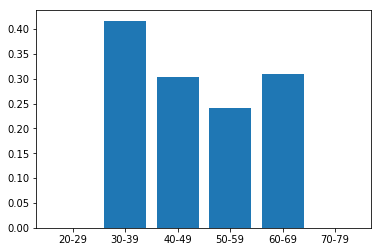

In [149]:
rec_per_age = percent_per_category(original_df, 'age', 'y', ages)
plt.bar(x=rec_per_age.keys(), height=rec_per_age.values())

Taxa de recorrência em % por faixa etária

In [150]:
len(original_df[original_df['age'] == '20-29'])

1

20-29 tem 0 recorrência porém só tem 1 exemplo no dataset, não dá para considerar, pelos restantes, de fato, parece que não há grande correlação entre idade e recorrência, apenas a faixa etária de 30-39 que apresenta % maior que a média, curiosamente.

### Mesma coisa, pra menopausa

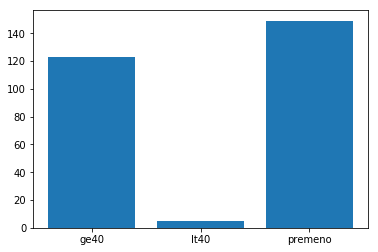

In [151]:
menp = histogram_of_column('menopause')

Positive recurrence rate for key ge40: 0.2682926829268293
Positive recurrence rate for key lt40: 0.0
Positive recurrence rate for key premeno: 0.3221476510067114


<BarContainer object of 3 artists>

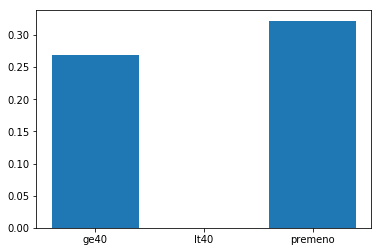

In [152]:
rec_per_menp = percent_per_category(original_df, 'menopause', 'y', menp)
plt.bar(x=rec_per_menp.keys(), height=rec_per_menp.values())

Menopausa de fato não demonstra correlação

### Tamanho do Tumor

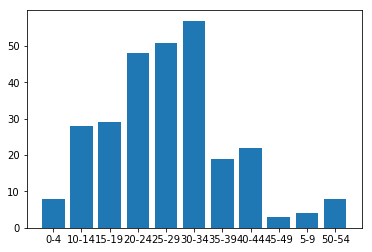

In [153]:
tumor_s = histogram_of_column('tumor-size')

(obs.: 5-9 ficou no lugar errado, to com preguiça de arrumar)

Positive recurrence rate for key 0-4: 0.125
Positive recurrence rate for key 10-14: 0.03571428571428571
Positive recurrence rate for key 15-19: 0.20689655172413793
Positive recurrence rate for key 20-24: 0.2916666666666667
Positive recurrence rate for key 25-29: 0.35294117647058826
Positive recurrence rate for key 30-34: 0.42105263157894735
Positive recurrence rate for key 35-39: 0.3684210526315789
Positive recurrence rate for key 40-44: 0.2727272727272727
Positive recurrence rate for key 45-49: 0.3333333333333333
Positive recurrence rate for key 5-9: 0.0
Positive recurrence rate for key 50-54: 0.375


<BarContainer object of 11 artists>

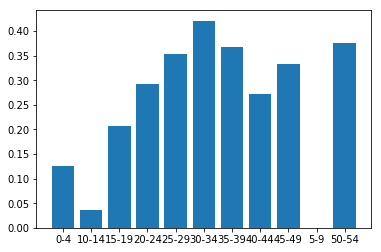

In [154]:
rec_per_tumor_s = percent_per_category(original_df, 'tumor-size', 'y', tumor_s)
plt.bar(x=rec_per_tumor_s.keys(), height=rec_per_tumor_s.values())

A partir do tamanho 20, a taxa de recorrência já fica acima da média, há correlação.

## inv-nodes

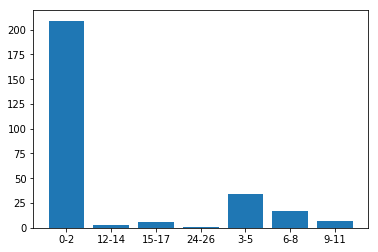

In [155]:
inv = histogram_of_column('inv-nodes')

Positive recurrence rate for key 0-2: 0.20574162679425836
Positive recurrence rate for key 12-14: 0.6666666666666666
Positive recurrence rate for key 15-17: 0.5
Positive recurrence rate for key 24-26: 1.0
Positive recurrence rate for key 3-5: 0.5
Positive recurrence rate for key 6-8: 0.5882352941176471
Positive recurrence rate for key 9-11: 0.7142857142857143


<BarContainer object of 7 artists>

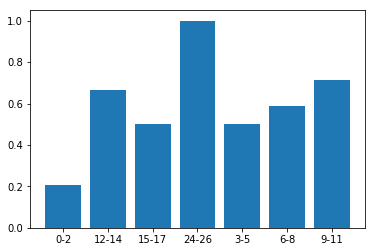

In [156]:
rec_per_inv = percent_per_category(original_df, 'inv-nodes', 'y', inv)
plt.bar(x=rec_per_inv.keys(), height=rec_per_inv.values())

Demonstra grande correlação, porém é difícil afirmar alguma coisa pois há poucos exemplos em todas as categorias acima de 0-2

## node-caps

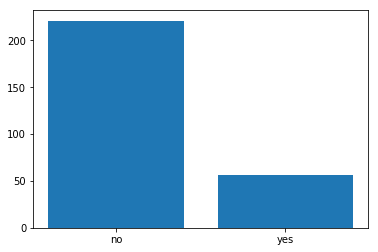

In [157]:
caps = histogram_of_column('node-caps')

Positive recurrence rate for key no: 0.22624434389140272
Positive recurrence rate for key yes: 0.5535714285714286


<BarContainer object of 2 artists>

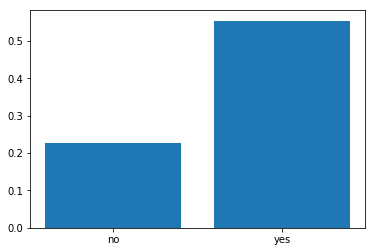

In [158]:
rec_per_caps = percent_per_category(original_df, 'node-caps', 'y', caps)
plt.bar(x=rec_per_caps.keys(), height=rec_per_caps.values())

Correlação bastante evidente

## deg-malig

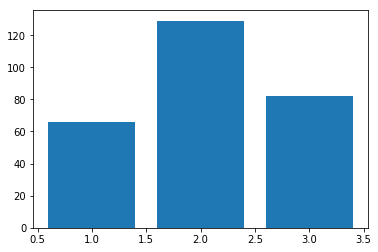

In [160]:
deg = histogram_of_column('deg-malig')

Positive recurrence rate for key 1: 0.13636363636363635
Positive recurrence rate for key 2: 0.21705426356589147
Positive recurrence rate for key 3: 0.5365853658536586


<BarContainer object of 3 artists>

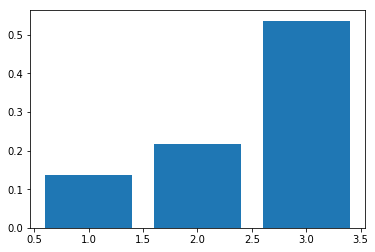

In [161]:
rec_per_deg = percent_per_category(original_df, 'deg-malig', 'y', deg)
plt.bar(x=rec_per_deg.keys(), height=rec_per_deg.values())

Também demonstra correlação

## breast-side

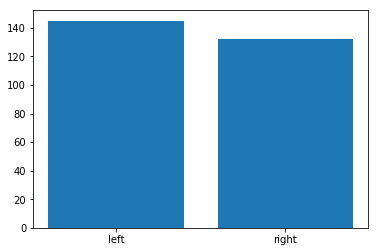

In [163]:
bside = histogram_of_column('side')

Positive recurrence rate for key left: 0.3103448275862069
Positive recurrence rate for key right: 0.2727272727272727


<BarContainer object of 2 artists>

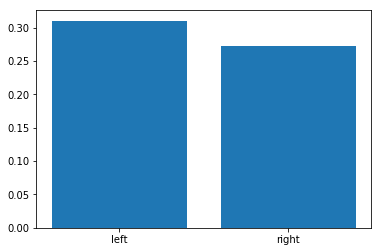

In [164]:
rec_per_bside = percent_per_category(original_df, 'side', 'y', bside)
plt.bar(x=rec_per_bside.keys(), height=rec_per_bside.values())

Nenhuma correlação com qual peito

## Breast-quad

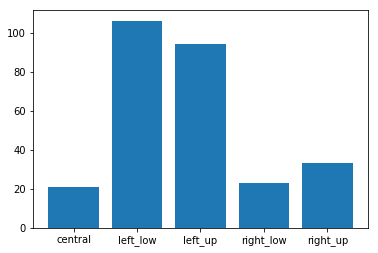

In [166]:
bquad = histogram_of_column('quad')

Positive recurrence rate for key central: 0.19047619047619047
Positive recurrence rate for key left_low: 0.3113207547169811
Positive recurrence rate for key left_up: 0.26595744680851063
Positive recurrence rate for key right_low: 0.2608695652173913
Positive recurrence rate for key right_up: 0.3939393939393939


<BarContainer object of 5 artists>

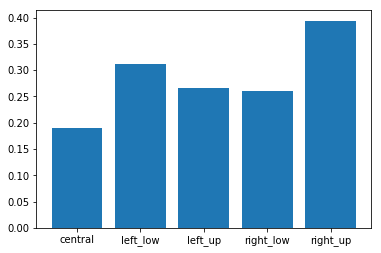

In [167]:
rec_per_bquad = percent_per_category(original_df, 'quad', 'y', bquad)
plt.bar(x=rec_per_bquad.keys(), height=rec_per_bquad.values())

Aparenta correlação com "central" e "right_up", porém olhando no gráfico acima, as duas classes têm poucos exemplos, não dá pra considerar muito, as duas classes com mais exemplos ("left_low" e "left_up") se aproximam da média

## irradiat

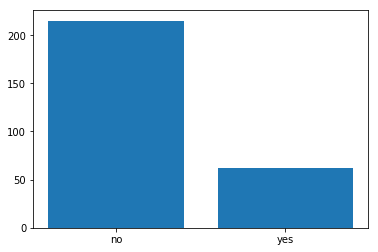

In [169]:
irrad = histogram_of_column('irradiat')

Positive recurrence rate for key no: 0.2372093023255814
Positive recurrence rate for key yes: 0.4838709677419355


<BarContainer object of 2 artists>

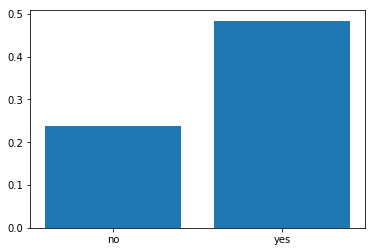

In [170]:
rec_per_irrad = percent_per_category(original_df, 'irradiat', 'y', irrad)
plt.bar(x=rec_per_irrad.keys(), height=rec_per_irrad.values())

Também demonstra correlação

## Criando o modelo

In [331]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.sql.functions import col

from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
from sklearn.decomposition import PCA

In [174]:
sc = SparkContext(appName="trabalho_nn")
sc

<SparkContext master=local[*] appName=trabalho_nn>

In [177]:
spark = SparkSession(sc)

In [178]:
spark_df = spark.createDataFrame(df)
spark_df

DataFrame[deg-malig: bigint, y_recurrence-events: bigint, age_20-29: bigint, age_30-39: bigint, age_40-49: bigint, age_50-59: bigint, age_60-69: bigint, age_70-79: bigint, menopause_ge40: bigint, menopause_lt40: bigint, menopause_premeno: bigint, tumor-size_0-4: bigint, tumor-size_10-14: bigint, tumor-size_15-19: bigint, tumor-size_20-24: bigint, tumor-size_25-29: bigint, tumor-size_30-34: bigint, tumor-size_35-39: bigint, tumor-size_40-44: bigint, tumor-size_45-49: bigint, tumor-size_5-9: bigint, tumor-size_50-54: bigint, inv-nodes_0-2: bigint, inv-nodes_12-14: bigint, inv-nodes_15-17: bigint, inv-nodes_24-26: bigint, inv-nodes_3-5: bigint, inv-nodes_6-8: bigint, inv-nodes_9-11: bigint, node-caps_yes: bigint, side_left: bigint, side_right: bigint, quad_central: bigint, quad_left_low: bigint, quad_left_up: bigint, quad_right_low: bigint, quad_right_up: bigint, irradiat_yes: bigint]

In [186]:
spark_df.count()

277

## Juntando as features num arrayzao (no spark eh assim)

In [212]:
assembler = VectorAssembler()\
    .setInputCols([i for i in spark_df.columns if not i == 'y_recurrence-events'])\
    .setOutputCol("features")

In [215]:
dataset = assembler.transform(spark_df).select("features", "y_recurrence-events")
dataset = dataset.select(col("features").alias("features"), col("y_recurrence-events").alias("label"))
dataset.show(n=250)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(37,[0,2,9,15,21,...|    0|
|(37,[0,3,9,13,21,...|    0|
|(37,[0,3,9,13,21,...|    0|
|(37,[0,5,7,12,21,...|    0|
|(37,[0,3,9,10,21,...|    0|
|(37,[0,5,7,12,21,...|    0|
|(37,[0,4,9,14,21,...|    0|
|(37,[0,5,7,13,21,...|    0|
|(37,[0,3,9,20,21,...|    0|
|(37,[0,3,9,13,21,...|    0|
|(37,[0,3,9,10,21,...|    0|
|(37,[0,4,7,14,21,...|    0|
|(37,[0,5,8,11,21,...|    0|
|(37,[0,4,7,14,21,...|    0|
|(37,[0,3,9,15,21,...|    0|
|(37,[0,5,8,15,21,...|    0|
|(37,[0,3,9,12,21,...|    0|
|(37,[0,4,9,15,21,...|    0|
|(37,[0,5,7,15,21,...|    0|
|(37,[0,4,7,15,21,...|    0|
|(37,[0,4,7,17,21,...|    0|
|(37,[0,5,7,12,21,...|    0|
|(37,[0,2,9,14,21,...|    0|
|(37,[0,4,9,17,21,...|    0|
|(37,[0,4,9,16,21,...|    0|
|(37,[0,3,9,14,21,...|    0|
|(37,[0,4,9,13,21,...|    0|
|(37,[0,5,7,14,21,...|    0|
|(37,[0,3,9,17,21,...|    0|
|(37,[0,5,7,15,21,...|    0|
|(37,[0,4,7,17,21,...|    0|
|(37,[0,4,9,12

`features` parece que ta zuado mesmo mas é porque o spark usa [sparse representation](https://stackoverflow.com/a/40506131/6949958) pra otimizar memória

## Train-Test split com stratify

In [242]:
def df_split(dataset, size):
    train, test = train_test_split(dataset.toPandas(), test_size=size, random_state=42, 
                                   stratify=dataset.select('label').toPandas().values)
    return spark.createDataFrame(train), spark.createDataFrame(test)

In [243]:
train, test = df_split(dataset, 0.3)

In [244]:
train.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(37,[0,4,7,12,21,...|    0|
|(37,[0,5,7,13,21,...|    0|
|(37,[0,5,7,17,25,...|    1|
|(37,[0,4,7,13,25,...|    0|
|(37,[0,3,7,13,21,...|    0|
|(37,[0,5,7,14,21,...|    1|
|(37,[0,3,9,14,21,...|    0|
|(37,[0,2,9,13,25,...|    1|
|(37,[0,3,9,14,21,...|    0|
|(37,[0,4,9,15,21,...|    0|
|(37,[0,5,7,15,26,...|    0|
|(37,[0,3,9,12,21,...|    1|
|(37,[0,5,7,12,21,...|    0|
|(37,[0,4,7,17,21,...|    0|
|(37,[0,4,9,11,21,...|    0|
|(37,[0,5,7,15,21,...|    0|
|(37,[0,6,7,11,21,...|    0|
|(37,[0,5,7,12,21,...|    0|
|(37,[0,3,9,10,21,...|    0|
|(37,[0,4,9,11,21,...|    0|
+--------------------+-----+
only showing top 20 rows



In [245]:
test.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|(37,[0,4,9,14,25,...|    0|
|(37,[0,4,7,13,21,...|    0|
|(37,[0,6,7,10,21,...|    0|
|(37,[0,4,7,15,26,...|    1|
|(37,[0,5,7,13,21,...|    0|
|(37,[0,5,7,12,21,...|    0|
|(37,[0,3,9,13,25,...|    0|
|(37,[0,2,9,12,21,...|    0|
|(37,[0,3,9,11,21,...|    0|
|(37,[0,4,7,14,21,...|    0|
|(37,[0,4,9,14,21,...|    0|
|(37,[0,2,9,10,21,...|    1|
|(37,[0,4,8,12,21,...|    0|
|(37,[0,4,7,15,25,...|    1|
|(37,[0,3,9,13,21,...|    0|
|(37,[0,5,7,15,21,...|    1|
|(37,[0,3,9,14,21,...|    1|
|(37,[0,2,9,19,21,...|    0|
|(37,[0,4,9,15,21,...|    0|
|(37,[0,4,9,12,21,...|    1|
+--------------------+-----+
only showing top 20 rows



## Treinando uma regressão logística

In [272]:
lr = LogisticRegression(maxIter=10, regParam=0.01, elasticNetParam=0.8)
lrModel = lr.fit(train)

print("Coefficients: " + str(lrModel.coefficients))
print("Intercept: " + str(lrModel.intercept))

Coefficients: [0.5364812999621126,0.0,0.29506331771314837,-0.05214987762302012,-0.22333232142114484,0.0,-0.9726089178658875,-0.32512875601590585,-1.1195585122542242,0.0,-1.1538764177063883,-1.3031952246739344,0.0,0.0,0.30618841551128184,0.0,0.27484501405106915,-0.36168636277617633,0.0,-0.7019884102442366,0.7432445385357409,-1.0394075509884944,-0.2981899698557155,0.39683825296336434,0.0,0.0,-0.2770976007411459,2.522836661582358,0.2895399185241159,0.0,-0.21041584345135414,-0.7639336305336665,-0.14677751783388582,0.0,-0.28218207343302126,0.5116454681086671,0.2727216158940456]
Intercept: -1.0451245915290313


areaUnderROC: 0.8223409801876955


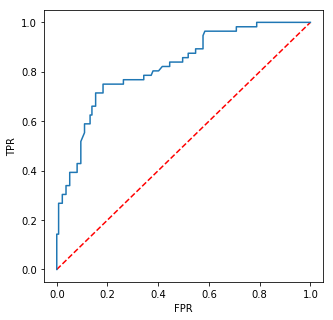

In [273]:
trainingSummary = lrModel.summary
# trainingSummary.roc.show()
print("areaUnderROC: " + str(trainingSummary.areaUnderROC))

plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(lrModel.summary.roc.select('FPR').collect(),
         lrModel.summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Area under curve

In [307]:
predictions = lrModel.transform(test)

y_true = predictions.select("label")
y_pred = predictions.select("prediction")

y_true = y_true.toPandas()
y_pred = y_pred.toPandas()

cnf_matrix = confusion_matrix(y_true, y_pred)

print('F1 score:', f1_score(y_true, y_pred))
cnf_matrix

F1 score: 0.39024390243902435


array([[51,  8],
       [17,  8]])

Dá pra ver que temos mais `false negatives` (17) que `false positives` (8), portanto o modelo está enviesado para o 0 

In [310]:
print('Accuracy:', accuracy_score(y_true, y_pred))
print('Metrics Report')
print(classification_report(y_true, y_pred))

Accuracy: 0.7023809523809523
Metrics Report
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        59
           1       0.50      0.32      0.39        25

   micro avg       0.70      0.70      0.70        84
   macro avg       0.62      0.59      0.60        84
weighted avg       0.68      0.70      0.68        84



Apesar do accuracy estar em 70%, dá pra ver pela matriz de confusão que a regressão simplesmente jogou quase tudo pra 0, o que faz sentido, como 70% do dataset tem y=0... Por isso o `recall` está tão ruim.

## Testando o VotedPerceptron

In [311]:
class VotedPerceptron:
    def __init__(self, n_iter):
        self.n_iter = n_iter
        self.V = []
        self.C = []
        self.k = 0
    
    def fit(self, x, y):
        for i in range(len(y)):
            if y[i] == 0:
                y[i] = -1
        k = 0
        v = [np.ones_like(x)[0]]
        c = [0]
        for epoch in range(self.n_iter): # runs through the data n_iter times
            for i in range(len(x)):
                pred = 1 if np.dot(v[k], x[i]) > 0 else -1 # checks the sing of v*k
                if pred == y[i]: # checks if the prediction matches the real Y
                    c[k] += 1
                else:
                    v.append(np.add(v[k], np.dot(y[i], x[i])))
                    c.append(1)
                    k += 1
                    
        self.V = v
        self.C = c
        self.k = k

    def predict(self, X):
        preds = []
        for x in X:
            s = 0
            for w, c in zip(self.V, self.C):
                s = s + c*np.sign(np.dot(w, x))
            preds.append(np.sign(1 if s >= 0 else 0))
            
        return preds

[Referência](https://vpcsilva.github.io/voted-perceptron/)

In [333]:
X = df[[i for i in df.columns if not i == 'y_recurrence-events']]
y = df[['y_recurrence-events']]

In [348]:
pca = PCA(n_components=2)
Xr = pca.fit_transform(X)

In [356]:
def list_from_series(df, column):
    return list(df[column])

X_train, X_test, y_train, y_test = train_test_split(Xr, y, test_size=0.3, random_state=42, 
                                                    stratify=df['y_recurrence-events'].values)

y_train = list_from_series(y_train, 'y_recurrence-events')
y_test = list_from_series(y_test, 'y_recurrence-events')

In [381]:
v_perc = VotedPerceptron(n_iter=100)
v_perc.fit(X_train, y_train)

In [382]:
y_pred = v_perc.predict(X_test)

In [388]:
print('F1 score:', f1_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

F1 score: 0.5245901639344263


array([[39, 20],
       [ 9, 16]])

In [384]:
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Metrics Report')
print(classification_report(y_test, y_pred))

Accuracy score:  0.6547619047619048
Metrics Report
              precision    recall  f1-score   support

           0       0.81      0.66      0.73        59
           1       0.44      0.64      0.52        25

   micro avg       0.65      0.65      0.65        84
   macro avg       0.63      0.65      0.63        84
weighted avg       0.70      0.65      0.67        84



Teve mais `false_positives` dessa vez, embora o `accuracy` tenha sido menor (65% ante 70%), <br>
o F1 score melhorou significativamente (52% ante 39%)

## Variando o parâmtro: número de iterações

In [404]:
def get_metrics(y_test, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = conf_mat[1][1]/(conf_mat[1][1] + conf_mat[0][1])
    recall = conf_mat[1][1]/(conf_mat[1][1] + conf_mat[1][0])
    f1_score = 1/((1/recall + 1/precision)/2)
    return conf_mat, accuracy, precision, recall, f1_score

10 valores diferentes para `n_iter`, linearmente espaçados entre 1 e 1000

In [414]:
iters = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

In [400]:
def get_pred(i):
    print(f'Treinando i={i}')
    v_perc = VotedPerceptron(n_iter=i)
    v_perc.fit(X_train, y_train)
    return v_perc.predict(X_test)

In [415]:
results = {str(i): get_metrics(y_test, get_pred(i)) for i in iters}

Treinando i=1
Treinando i=2
Treinando i=4
Treinando i=8
Treinando i=16
Treinando i=32
Treinando i=64
Treinando i=128
Treinando i=256
Treinando i=512


In [416]:
make_arr_of_pos = lambda pos: [i[pos] for i in results.values()]

results_df = pd.DataFrame(data={
    'n_iter': list(results.keys()),
    'conf_mat': make_arr_of_pos(0),
    'accuracy': make_arr_of_pos(1),
    'precision': make_arr_of_pos(2),
    'recall': make_arr_of_pos(3),
    'f1': make_arr_of_pos(4)
})
results_df

,n_iter,conf_mat,accuracy,precision,recall,f1
0,1,"[[39, 20], [9, 16]]",0.654762,0.444444,0.64,0.524590
1,2,"[[36, 23], [7, 18]]",0.642857,0.439024,0.72,0.545455
2,4,"[[39, 20], [9, 16]]",0.654762,0.444444,0.64,0.524590
3,8,"[[39, 20], [9, 16]]",0.654762,0.444444,0.64,0.524590
4,16,"[[40, 19], [9, 16]]",0.666667,0.457143,0.64,0.533333
5,32,"[[40, 19], [9, 16]]",0.666667,0.457143,0.64,0.533333
6,64,"[[39, 20], [9, 16]]",0.654762,0.444444,0.64,0.524590
7,128,"[[39, 20], [9, 16]]",0.654762,0.444444,0.64,0.524590
8,256,"[[39, 20], [9, 16]]",0.654762,0.444444,0.64,0.524590
9,512,"[[40, 19], [9, 16]]",0.666667,0.457143,0.64,0.533333


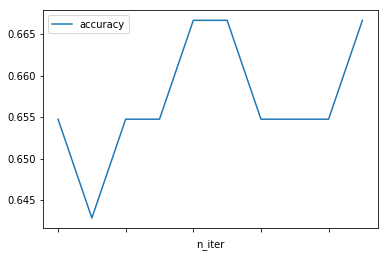

In [417]:
results_df.plot(x='n_iter', y='accuracy')

Gráfico do número de iterações pela `accuracy`

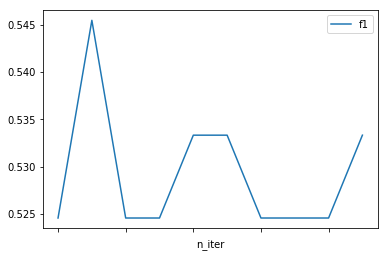

In [418]:
results_df.plot(x='n_iter', y='f1')

Número de iterações X `f1 score`